#DataLoad

In [ ]:
import zipfile
import os


zip_path = "/content/archive.zip"


extract_dir = "/content/unzipped_data"


os.makedirs(extract_dir, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipping complete. Files extracted to:", extract_dir)


✅ Unzipping complete. Files extracted to: /content/unzipped_data


In [ ]:
# List files and folders
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))


/content/unzipped_data/Readme.md
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/7636.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/2900.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/3677.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/3567.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/6403.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/2539.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/4098.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/6270.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/2830.jpg
/content/unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/4478.jpg
/content/unzipped

#EffecientNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Set base directory
base_dir = "unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Load EfficientNetB0 without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Build model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=10)

# Evaluate
loss, acc = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {acc:.4f}")


Found 5200 images belonging to 2 classes.
Found 1416 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 690ms/step - accuracy: 0.9608 - loss: 0.3654 - val_accuracy: 0.9343 - val_loss: 0.2442
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 556ms/step - accuracy: 0.9650 - loss: 0.1659 - val_accuracy: 0.9343 - val_loss: 0.2458
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 552ms/step - accuracy: 0.9613 - loss: 0.1662 - val_accuracy: 0.9343 - val_loss: 0.2502
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 547ms/step - accuracy: 0.9635 - loss: 0.1593 - val_accuracy: 0.9343 - val_loss: 0.2511
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 551ms/step - accuracy: 0.9613 - loss: 0.1643 - val_accuracy: 0.9343 - val_loss: 0.2522
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 554ms/step - accuracy: 0.9630 - loss: 0.1593 - val_accuracy: 0.9343 - val_loss: 0.2523
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 555ms/step - accuracy: 0.9605 - loss: 0.1684 - val_accuracy: 0.9343 - val_loss: 0.2526
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 577ms/step - accuracy: 0.9643 - loss: 

✅ Model saved as 'fraud_classifier_model.h5'
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step


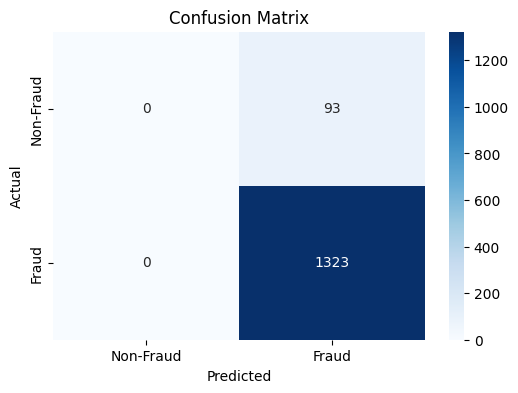

📋 Classification Report:

              precision    recall  f1-score   support

   Non-Fraud       0.00      0.00      0.00        93
       Fraud       0.93      1.00      0.97      1323

    accuracy                           0.93      1416
   macro avg       0.47      0.50      0.48      1416
weighted avg       0.87      0.93      0.90      1416

🧠 ROC-AUC Score: 0.7157


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Save the model
model.save("fraud_classifier_model.h5")
print("✅ Model saved as 'fraud_classifier_model.h5'")

# Step 2: Get predictions and labels
y_pred_probs = model.predict(test_gen)
y_preds = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_gen.classes

# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 4: Classification report
print("📋 Classification Report:\n")
print(classification_report(y_true, y_preds, target_names=["Non-Fraud", "Fraud"]))

# Step 5: ROC-AUC Score
roc_auc = roc_auc_score(y_true, y_pred_probs)
print(f"🧠 ROC-AUC Score: {roc_auc:.4f}")


In [ ]:
from google.colab import files

# Download the model file to your local machine
files.download("fraud_classifier_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#AlexNet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load model
model = tf.keras.models.load_model('fraud_classifier_model.h5')

# Step 2: Load and preprocess image (with PIL fallback)
img_path = 'scam-rear-end-car-accident.png'

try:
    with Image.open(img_path) as img:
        img = img.convert("RGB")  # Ensure 3 channels
        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
except Exception as e:
    print("❌ Failed to load image:", e)
    raise

# Step 3: Predict
prediction = model.predict(img_array)[0][0]
label = "Fraud" if prediction > 0.5 else "Non-Fraud"

# Step 4: Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {label} (Confidence: {prediction:.2f})")
plt.show()


❌ Failed to load image: cannot identify image file 'scam-rear-end-car-accident.png'


UnidentifiedImageError: cannot identify image file 'scam-rear-end-car-accident.png'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Paths
base_dir = "unzipped_data/Insurance-Fraud-Detection/Insurance-Fraud-Detection"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image settings
IMG_SIZE = (227, 227)  # AlexNet uses 227x227 input
BATCH_SIZE = 32

# Data generators
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# ✅ AlexNet model
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=2),

    Conv2D(256, kernel_size=(5,5), padding="same", activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=2),

    Conv2D(384, kernel_size=(3,3), padding="same", activation='relu'),
    Conv2D(384, kernel_size=(3,3), padding="same", activation='relu'),
    Conv2D(256, kernel_size=(3,3), padding="same", activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=test_data, epochs=10)

# Save model
model.save("/content/alexnet_fraud_classifier.h5")
print("✅ Model saved as 'alexnet_fraud_classifier.h5'")


Found 5200 images belonging to 2 classes.
Found 1416 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 592ms/step - accuracy: 0.9455 - loss: 0.3280 - val_accuracy: 0.9343 - val_loss: 0.2495
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 542ms/step - accuracy: 0.9592 - loss: 0.1821 - val_accuracy: 0.9343 - val_loss: 0.2566
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 546ms/step - accuracy: 0.9629 - loss: 0.1667 - val_accuracy: 0.9343 - val_loss: 0.2462
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 549ms/step - accuracy: 0.9584 - loss: 0.1596 - val_accuracy: 0.9343 - val_loss: 0.2207
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 570ms/step - accuracy: 0.9651 - loss: 0.1533 - val_accuracy: 0.9343 - val_loss: 0.2345
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 583ms/step - accuracy: 0.9618 - loss: 0.1487 - val_accuracy: 0.9343 - val_loss: 0.2451
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 583ms/step - accuracy: 0.9620 - loss: 0.1407 - val_accuracy: 0.9343 - val_loss: 0.2128
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 566ms/step - accuracy: 0.9562 - loss: 

✅ Model saved as 'alexnet_fraud_classifier.h5'


45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step


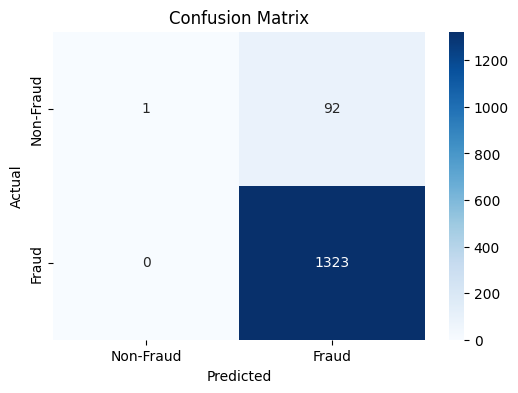

📋 Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.01      0.02        93
       Fraud       0.93      1.00      0.97      1323

    accuracy                           0.94      1416
   macro avg       0.97      0.51      0.49      1416
weighted avg       0.94      0.94      0.90      1416

🧠 ROC-AUC Score: 0.7529


In [ ]:
# Evaluate and predict
y_pred_probs = model.predict(test_data)
y_preds = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("📋 Classification Report:")
print(classification_report(y_true, y_preds, target_names=["Non-Fraud", "Fraud"]))

# ROC-AUC
roc_auc = roc_auc_score(y_true, y_pred_probs)
print(f"🧠 ROC-AUC Score: {roc_auc:.4f}")
